# Determining the Detector Pixel Size of an EBSD Camera

Håkon Wiik Ånes

2019-05-06
___

We calculate the detector pixel size as

$$
\textrm{Detector pixel size} = \frac{\textrm{Grid spacing in}\:\mu\textrm{m}}{\textrm{Detector binning}\cdot\textrm{Grid spacing in pixels}}.
$$

The calculation assumes that the grid is aligned with the detector edges.

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

h = 6
newparams = {'figure.figsize': (h*1.61, h), 'figure.dpi': 100,
             'lines.linewidth': 1, 'lines.markersize': 10,
             'font.size': 15, 'markers.fillstyle': 'none',
             'lines.markeredgewidth': 1}
plt.rcParams.update(newparams)

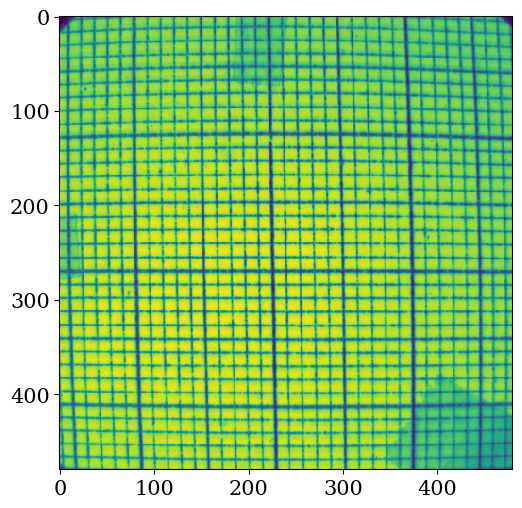

In [2]:
pat = plt.imread('cal2_grid.bmp')

# Set parameters
grid_spacing_um = 1e3
detector_binning = 1

# Inspect grid pattern
plt.imshow(pat);

Average grid distance along the
	x axis: 14.3 px
	y axis: 14.2 px.
Detector Pixel Size: 70.14 um.


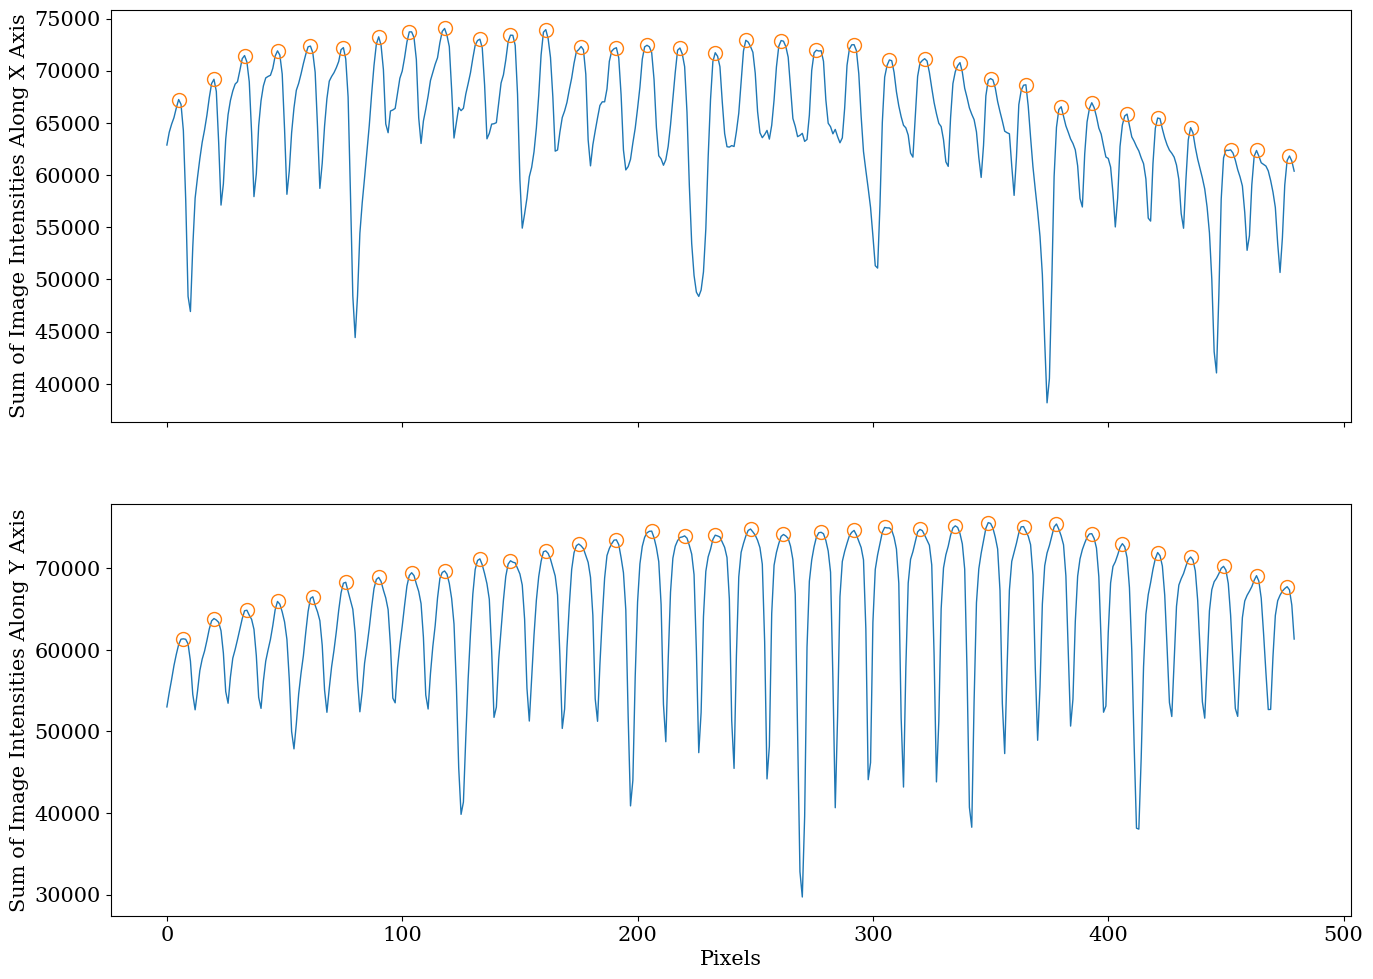

In [4]:
# Sum intensities along x and y axes
sum_x = np.sum(pat, axis=0)
sum_y = np.sum(pat, axis=1)
pixels = np.arange(pat.shape[0])

# Detect intensity peaks
peaks_x, _ = find_peaks(sum_x, distance=10)
peaks_y, _ = find_peaks(sum_y, distance=10)

# Grid spacing in pixels
grid_spacing_x = np.mean(np.diff(peaks_x))
grid_spacing_y = np.mean(np.diff(peaks_y))
grid_spacing_px = np.mean([grid_spacing_x, grid_spacing_y])
detector_px_size = grid_spacing_um / (detector_binning * grid_spacing_px)
print('Average grid distance along the\n'
      '\tx axis: {:.1f} px\n'
      '\ty axis: {:.1f} px.\n'
      'Detector Pixel Size: {:.2f} um.'.format(grid_spacing_x,
                                               grid_spacing_y,
                                               detector_px_size))

# Check quality of peak finding
fig, ax = plt.subplots(nrows=2, figsize=(16, 12), sharex=True)
ax[0].plot(pixels, sum_x)
ax[0].plot(peaks_x, sum_x[peaks_x], 'o')
ax[0].set_ylabel('Sum of Image Intensities Along X Axis')
ax[1].plot(pixels, sum_y)
ax[1].plot(peaks_y, sum_y[peaks_y], 'o')
ax[1].set_xlabel('Pixels')
ax[1].set_ylabel('Sum of Image Intensities Along Y Axis');